In [663]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from typing import List

In [664]:
plt.style.use('dark_background')

In [665]:
train_data = pd.read_csv(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\data\train.csv",
                        index_col='id')

In [666]:
train_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [667]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [668]:
train_data.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


# Nulls

## Drop Columns w/ Nulls Over Threshold

In [669]:
def drop_over_thrsld_nulls_cols(data: pd.DataFrame, nulls_threshold: float = 0.45):
    nulls_proportion = data.isnull().sum() / len(data)
    nulls_more_thrsld = nulls_proportion[nulls_proportion.ge(nulls_threshold)].index.tolist()
    nulls_less_thrsld = nulls_proportion[nulls_proportion.lt(nulls_threshold)].index.tolist()
    print(f"By the threshold: {nulls_threshold}\nDropped the next columns:\n{nulls_proportion[nulls_more_thrsld]}")
    data.drop(nulls_more_thrsld, axis=1, inplace=True)

In [670]:
drop_over_thrsld_nulls_cols(train_data)

By the threshold: 0.45
Dropped the next columns:
Academic Pressure     0.801727
CGPA                  0.801720
Study Satisfaction    0.801727
dtype: float64


## Handle Nulls

In [671]:
cols_w_nulls = train_data.columns[train_data.isnull().any()].tolist()

In [672]:
with_nulls = train_data[cols_w_nulls].isnull().sum() / len(train_data[cols_w_nulls])
with_nulls._name = "proportion_of_nulls"
with_nulls

Profession          0.260341
Work Pressure       0.198422
Job Satisfaction    0.198365
Dietary Habits      0.000028
Degree              0.000014
Financial Stress    0.000028
Name: proportion_of_nulls, dtype: float64

### Categorical Features

In [673]:
temp_cat_nulls_df = pd.merge(train_data[with_nulls.index.tolist()].describe(include=['O']).T, with_nulls, left_index=True, right_index=True)
temp_cat_nulls_df

,count,unique,top,freq,proportion_of_nulls
Profession,104070,64,Teacher,24906,0.260341
Dietary Habits,140696,23,Moderate,49705,0.000028
Degree,140698,115,Class 12,14729,0.000014


In [674]:
print(train_data['Profession'].value_counts(normalize=True).iloc[:5], train_data['Dietary Habits'].value_counts(normalize=True).iloc[:5], train_data['Degree'].value_counts(normalize=True).iloc[:5])

Profession
Teacher           0.239320
Content Writer    0.075084
Architect         0.041991
Consultant        0.040636
HR Manager        0.038647
Name: proportion, dtype: float64 Dietary Habits
Moderate        0.353279
Unhealthy       0.328559
Healthy         0.317998
Yes             0.000014
More Healthy    0.000014
Name: proportion, dtype: float64 Degree
Class 12    0.104685
B.Ed        0.083093
B.Arch      0.062133
B.Com       0.057663
B.Pharm     0.041621
Name: proportion, dtype: float64


### Numerical Features

In [675]:
temp_num_nulls_df = pd.merge(train_data[with_nulls.index.tolist()].describe().T, with_nulls, left_index=True, right_index=True)
temp_num_nulls_df

,count,mean,std,min,25%,50%,75%,max,proportion_of_nulls
Work Pressure,112782.0,2.998998,1.405771,1.0,2.0,3.0,4.0,5.0,0.198422
Job Satisfaction,112790.0,2.974404,1.416078,1.0,2.0,3.0,4.0,5.0,0.198365
Financial Stress,140696.0,2.988983,1.413633,1.0,2.0,3.0,4.0,5.0,0.000028


## Data Columns by `dtype`

In [676]:
TARGET = 'Depression'

In [677]:
YES_NO_COLS = ['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']

In [678]:
CAT_COLS = train_data.select_dtypes(object).columns.tolist()
CAT_COLS = [col for col in CAT_COLS if col not in YES_NO_COLS]
print(CAT_COLS)

['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']


In [679]:
NUM_COLS = train_data.select_dtypes([np.number]).columns.tolist()
NUM_COLS.remove(TARGET)
print(NUM_COLS)

['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [680]:
len(train_data.columns) == (len(NUM_COLS) + len(CAT_COLS) + len(YES_NO_COLS) + 1)

True

# Preprocess

In [681]:
def preprocess(data: pd.DataFrame, 
               yes_no_cols: List,
               ):
    processed_data = data.copy()
    processed_data = change_yes_no_to_bin(data=processed_data, columns_list=yes_no_cols)
    replace_values_with_(processed_data, col='Dietary Habits', values_to_keep=['Unhealthy', 'Healthy', 'Moderate'], replace_with='Unknown')
    map_rare2common_sleeping_hours(processed_data)
    return processed_data

def change_yes_no_to_bin(data: pd.DataFrame, columns_list: List ):
    for col in columns_list:
        data[col] =  np.where(data[col] == 'Yes', 1, 0)

    return data

def replace_values_with_(data: pd.DataFrame, col: str, values_to_keep: List, replace_with ):
    data.loc[~data[col].isin(values_to_keep), col] = replace_with


def map_rare2common_sleeping_hours(data: pd.DataFrame):
    data.loc[data["Sleep Duration"].isin(["10-11 hours","8-9 hours", "40-45 hours", "55-66 hours", "8-9 hours"]), "Sleep Duration"] = "More than 8 hours"
    data.loc[data["Sleep Duration"].isin(["6-7 hours", "8 hours"]), "Sleep Duration"] = "7-8 hours"
    data.loc[data["Sleep Duration"].isin(["4-6 hours"]), "Sleep Duration"] = "5-6 hours"
    data.loc[data["Sleep Duration"].isin(["2-3 hours","3-4 hours", "4-5 hours",]), "Sleep Duration"] = "Less than 5 hours"


In [682]:
processed_data = preprocess(data=train_data,
                            yes_no_cols=YES_NO_COLS)

In [683]:
processed_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,0,1.0,2.0,0,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,0,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,1,10.0,1.0,1,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,1,9.0,4.0,1,0


In [703]:
processed_data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38808
7-8 hours            36978
More than 8 hours    32732
5-6 hours            32147
6-8 hours                4
1-6 hours                4
No                       4
45                       2
9-11 hours               2
Sleep_Duration           2
Unhealthy                2
9-6 hours                1
1-2 hours                1
Moderate                 1
1-3 hours                1
35-36 hours              1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, dtype: int64

# Exploration

## Corr Heatmap

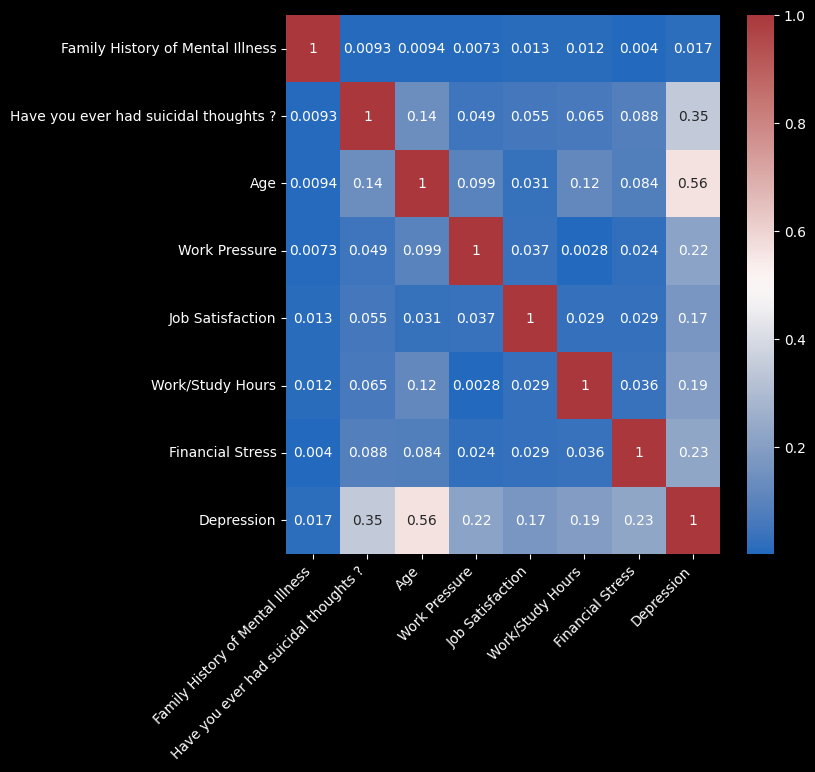

In [684]:
plt.figure(figsize=(7,7))
sns.heatmap(processed_data[YES_NO_COLS + NUM_COLS + [TARGET]].corr().abs(), cmap='vlag', annot=True)
plt.xticks(rotation=45, ha='right')
plt.show()

In [685]:
def annot_plot(ax):
    for i in ax.containers:
        ax.bar_label(i)

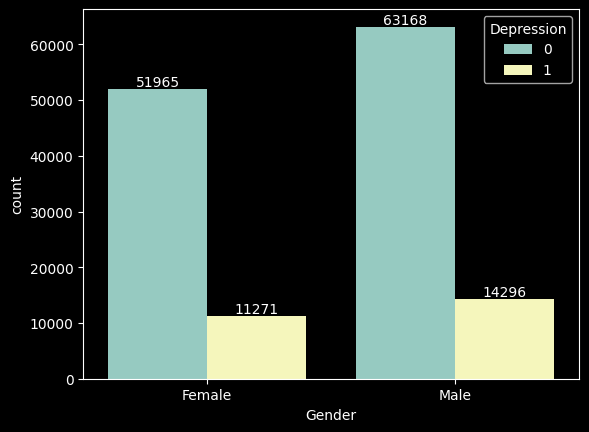

In [686]:
ax = sns.countplot(data=processed_data, x='Gender', hue='Depression')
annot_plot(ax)

## Depressed Population Exploration

In [687]:
dprsd_df = train_data.loc[train_data[TARGET] == 1]
dprsd_df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
15,Aditi,Female,23.0,Patna,Working Professional,Marketing Manager,2.0,2.0,5-6 hours,Healthy,MA,Yes,6.0,4.0,Yes,1
27,Aarav,Male,50.0,Ghaziabad,Working Professional,HR Manager,5.0,3.0,Less than 5 hours,Healthy,MA,Yes,12.0,5.0,Yes,1


### Professional or Student 

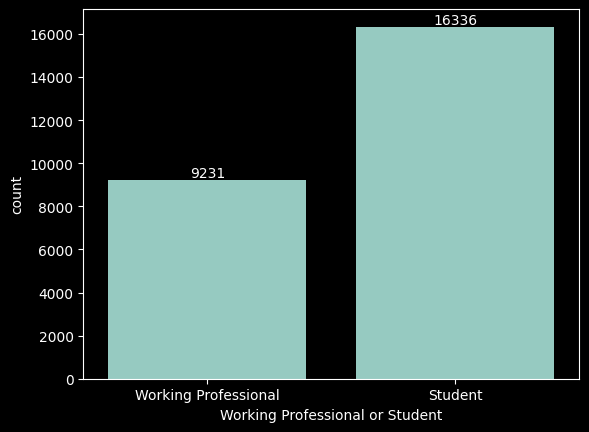

In [688]:
ax = sns.countplot(dprsd_df, x='Working Professional or Student', )
annot_plot(ax)

### Work Pressure

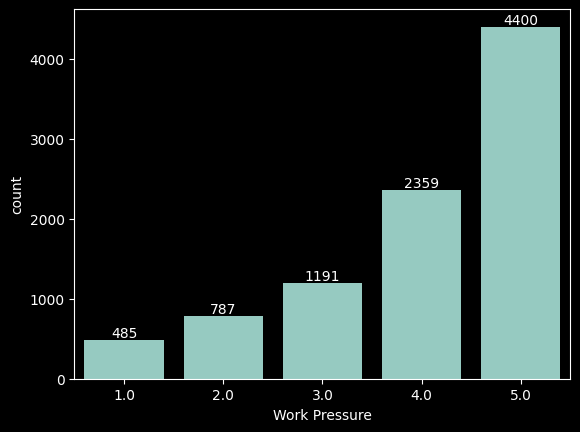

In [689]:
ax = sns.countplot(dprsd_df, x='Work Pressure')
annot_plot(ax)

### Job Satisfaction

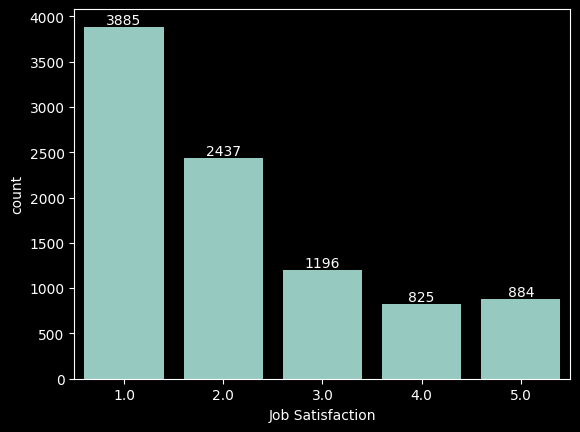

In [690]:
ax = sns.countplot(dprsd_df, x='Job Satisfaction')
annot_plot(ax)

### Work/Study Hours

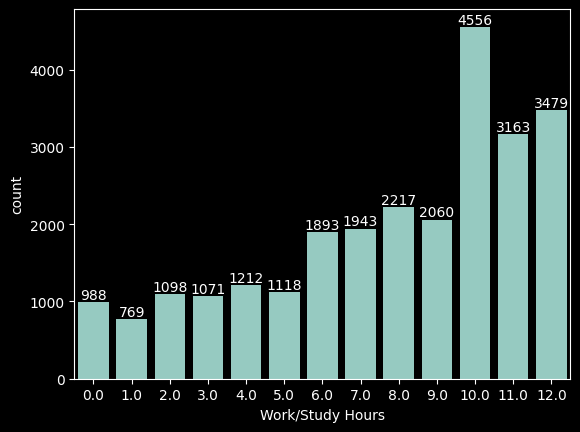

In [691]:
ax = sns.countplot(dprsd_df, x='Work/Study Hours')
annot_plot(ax)

### Financial Stress

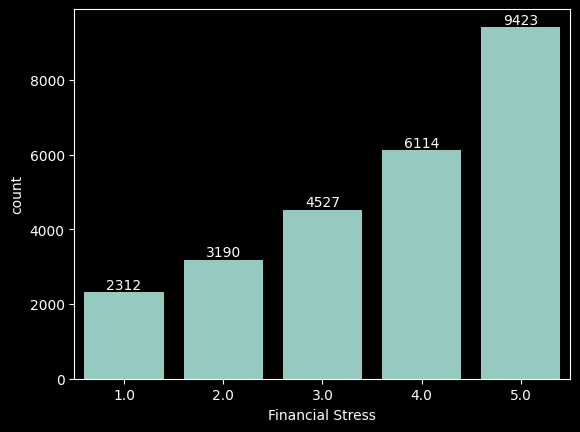

In [692]:
ax = sns.countplot(dprsd_df, x='Financial Stress')
annot_plot(ax)

### Family History of Mental Illness

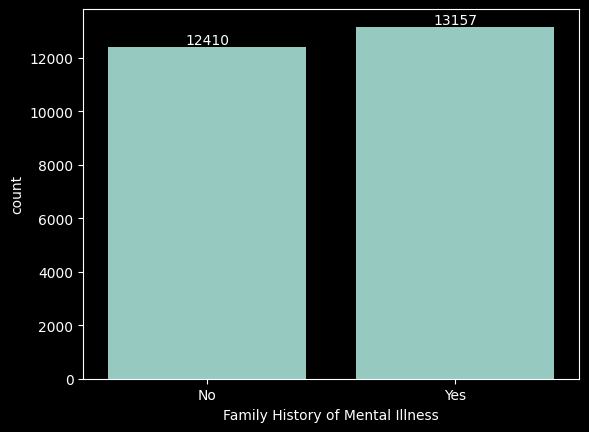

In [693]:
ax = sns.countplot(dprsd_df, x='Family History of Mental Illness')
annot_plot(ax)

### Have you ever had suicidal thoughts ?

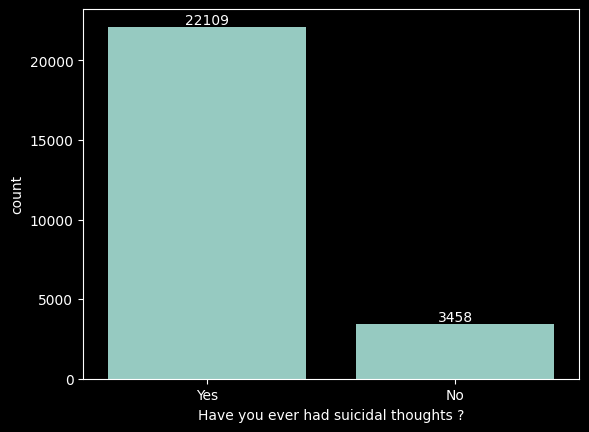

In [694]:
ax = sns.countplot(dprsd_df, x='Have you ever had suicidal thoughts ?')
annot_plot(ax)

### Age

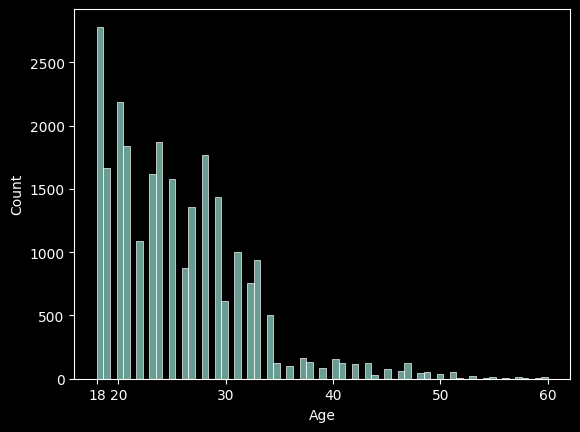

In [695]:
sns.histplot(dprsd_df, x='Age')
plt.xticks([dprsd_df['Age'].min(), 20, 30, 40, 50, dprsd_df['Age'].max()])
plt.show()

### Profession

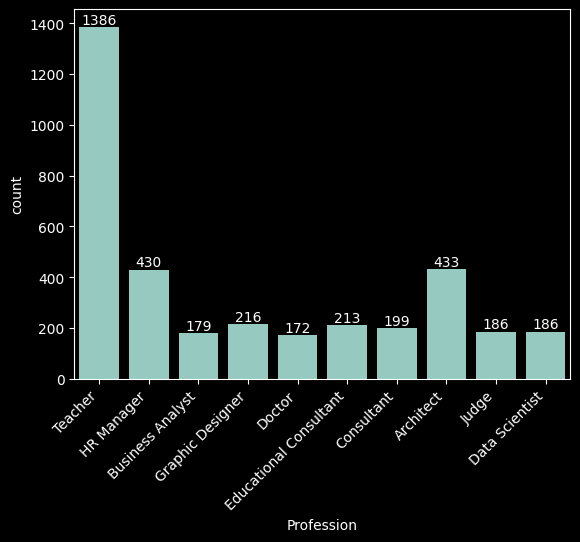

In [696]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Profession"].isin(dprsd_df['Profession'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Profession' ]], x='Profession')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

### Dietary Habits

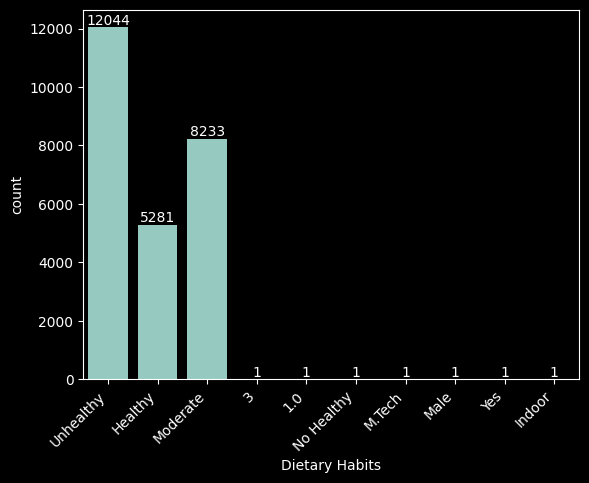

In [697]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Dietary Habits"].isin(dprsd_df['Dietary Habits'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Dietary Habits' ]], x='Dietary Habits')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

In [698]:
dprsd_df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

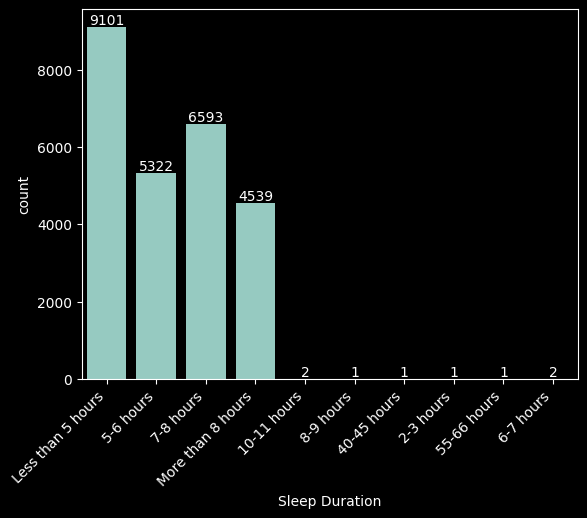

In [699]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Sleep Duration"].isin(dprsd_df['Sleep Duration'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Sleep Duration' ]], x='Sleep Duration')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

In [700]:
dprsd_df.loc[dprsd_df["Sleep Duration"].isin(["10-11 hours","8-9 hours", "40-45 hours", "55-66 hours", "8 hours"]), "Sleep Duration"] 

id
19051     10-11 hours
19695       8-9 hours
19915     40-45 hours
29050     55-66 hours
65456         8 hours
102871    10-11 hours
Name: Sleep Duration, dtype: object

In [701]:
dprsd_df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    9101
7-8 hours            6593
5-6 hours            5322
More than 8 hours    4539
10-11 hours             2
6-7 hours               2
8-9 hours               1
40-45 hours             1
55-66 hours             1
2-3 hours               1
4-5 hours               1
4-6 hours               1
8 hours                 1
3-4 hours               1
Name: count, dtype: int64

In [702]:
def map_rare2common_sleeping_hours(data: pd.DataFrame):
    data.loc[data["Sleep Duration"].isin(["10-11 hours","8-9 hours", "40-45 hours", "55-66 hours", "8-9 hours"]), "Sleep Duration"] = "More than 8 hours"
    data.loc[data["Sleep Duration"].isin(["6-7 hours", "8 hours"]), "Sleep Duration"] = "7-8 hours"
    data.loc[data["Sleep Duration"].isin(["4-6 hours"]), "Sleep Duration"] = "5-6 hours"
    data.loc[data["Sleep Duration"].isin(["2-3 hours","3-4 hours", "4-5 hours",]), "Sleep Duration"] = "Less than 5 hours"
